# SQLite HQ Hw

Load the necessary packages

In [1]:
%load_ext sql

In [54]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

***Create a database and connection***

In [3]:
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('student_grades.db')

#check if the connection was successful
print("Database created and connected!")

Database created and connected!


***Create a cursor***

In [4]:
# Create a cursor object to execute SQL queries
cursor = conn.cursor()

print("Cursor Created")

Cursor Created


***Create a students table***

In [12]:
# Create the students table if it doesn't exist
cursor.execute('''CREATE TABLE IF NOT EXISTS students 
(student_id INTEGER PRIMARY KEY,
first_name TEXT,
last_name TEXT)''')

conn.commit()

print("Students table created")

Students table created


***Insert data into the students table***

In [13]:
students_data = [
    (1, 'Alice', 'Johnson'), 
    (2, 'Bob', 'Smith'), 
    (3, 'Carol', 'White'), 
    (4, 'David', 'Brown'), 
    (5, 'Eve', 'Davis')]

#insert data into the table
cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES(?, ?, ?)
''', students_data)
#commit the transation
conn.commit()

print("Data inserted into the students table")

Data inserted into the students table


***Create a grades table***

In [19]:
cursor.execute('''CREATE TABLE IF NOT EXISTS grades 
(grade_id INTEGER PRIMARY KEY,
student_id INTEGER, subject TEXT,
grade INTEGER,
FOREIGN KEY (student_id) REFERENCES students(student_id))''')

print("Grades table created")

Grades table created


***Insert data into grades table***

In [20]:
grades_data = [
    (1, 'Math', '95'), 
    (1, 'English', '88'), 
    (1, 'History', '90'), 
    (2, 'Math', '82'),
    (2, 'English', '76'),
    (2, 'History', '85'),
    (3, 'Math', '72'),
    (3, 'English', '84'),
    (3, 'History', '95'),
    (4, 'Math', '86'),
    (4, 'English', '71'),
    (4, 'History', '89'),
    (5, 'Math', '96'),
    (5, 'English', '95'),
    (5, 'History', '80')]

#insert data into the table
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES(?, ?, ?)
''', grades_data)

#commit the transation
conn.commit()

print("Data inserted into the students table")

Data inserted into the students table


# Perform SQL queries

***Question 1: Retrieve all students' names and their grades***

In [71]:
cursor.execute("SELECT students.first_name, students.last_name, grades.grade FROM students JOIN grades ON students.student_id = grades.student_id ")
rows = cursor.fetchall()

# Print the results
print("All names and grades:")
for row in rows:
    print(row)

All names and grades:
('Alice', 'Johnson', 95)
('Alice', 'Johnson', 88)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 82)
('Bob', 'Smith', 76)
('Bob', 'Smith', 85)
('Carol', 'White', 72)
('Carol', 'White', 84)
('Carol', 'White', 95)
('David', 'Brown', 86)
('David', 'Brown', 71)
('David', 'Brown', 89)
('Eve', 'Davis', 96)
('Eve', 'Davis', 95)
('Eve', 'Davis', 80)


***Question 2: Find the average grade for each student***

In [72]:
cursor.execute("SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade FROM students JOIN grades ON students.student_id = grades.student_id GROUP BY students.first_name, students.last_name")
rows = cursor.fetchall()

# Print the results
print("Names and average grades:")
for row in rows:
    print(row)

Names and average grades:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 83.66666666666667)
('David', 'Brown', 82.0)
('Eve', 'Davis', 90.33333333333333)


***Question 3: Find the student with the highest average grade***

In [73]:
# Query for the student with the highest average grade
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.first_name, students.last_name
ORDER BY average_grade DESC
LIMIT 1
''')
highest_avg_grade = cursor.fetchone()

# Display the result
print(f"Student with the highest average grade: {highest_avg_grade[0]} {highest_avg_grade[1]}")

Student with the highest average grade: Alice Johnson


***Question 4: Find the average grade for the Math subject***

In [74]:
# Query for the average grade for the subject, Math, across all subjects
cursor.execute('''
SELECT AVG(grades.grade) AS average_grade FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.subject LIKE 'Math'
''')
average_math_grade = cursor.fetchone()

# Display the result
print(f"The average math grade is: {average_math_grade[0]}")

The average math grade is: 86.2


***Question 5: List all students who scored above 90 in any subject***

In [76]:
cursor.execute('''SELECT students.first_name, students.last_name, MAX(grades.grade) AS best_grade FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
GROUP BY students.first_name, students.last_name''')
rows = cursor.fetchall()

# Print the results
print("All students who got a above a 90 in any subject:")
for row in rows:
    print(row)

All students who got a above a 90 in any subject:
('Alice', 'Johnson', 95)
('Carol', 'White', 95)
('Eve', 'Davis', 96)


# Use Pandas to join the tables

Load the tables into pandas dataframes

In [50]:
students = pd.read_sql_query('''
SELECT * FROM students
''', conn)
students

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [51]:
grades = pd.read_sql_query('''
SELECT * FROM grades
''', conn)
grades

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76
5,6,2,History,85
6,7,3,Math,72
7,8,3,English,84
8,9,3,History,95
9,10,4,Math,86


Use JOIN Queries to combine into one dataframe

In [53]:
students_grades = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students
JOIN grades ON students.student_id = grades.student_id
''', conn)
students_grades

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76
5,Bob,Smith,History,85
6,Carol,White,Math,72
7,Carol,White,English,84
8,Carol,White,History,95
9,David,Brown,Math,86


***Question 1: Plot the average grades for each student***

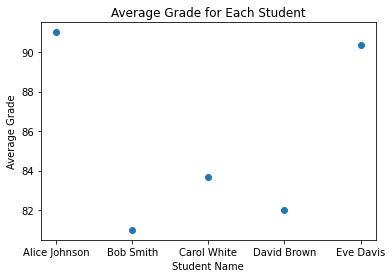

In [56]:
students_average_grade = pd.read_sql_query('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.first_name, students.last_name
''', conn)
rows = students_average_grade.values.tolist()
student_names = [f"{row[0]} {row[1]}" for row in rows]
average_grades = [row[2] for row in rows]

plt.scatter(student_names, average_grades)
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Student')
plt.show()

***Question 2: Create a bar chart showing the average grade for each subject***

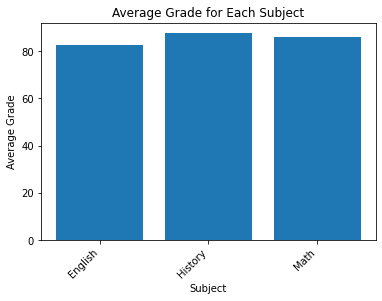

In [66]:
subject_average_grade = pd.read_sql_query('''
SELECT subject, AVG(grade) AS average_grade FROM grades
GROUP BY subject
''', conn)
rows = subject_average_grade.values.tolist()
subject = [row[0] for row in rows]
average_grades = [row[1] for row in rows]

plt.bar(subject, average_grades)
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bonus

***Question 1: Implement a query that finds the student with the highest grade in each subject.***

In [68]:
best_by_subject = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, MAX(grades.grade) AS Best_Grade FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY grades.subject
''', conn)
best_by_subject

,first_name,last_name,subject,Best_Grade
0,Eve,Davis,English,95
1,Carol,White,History,95
2,Eve,Davis,Math,96


***Question 2: Visualize the results using a grouped bar chart***

In [69]:
import seaborn as sns

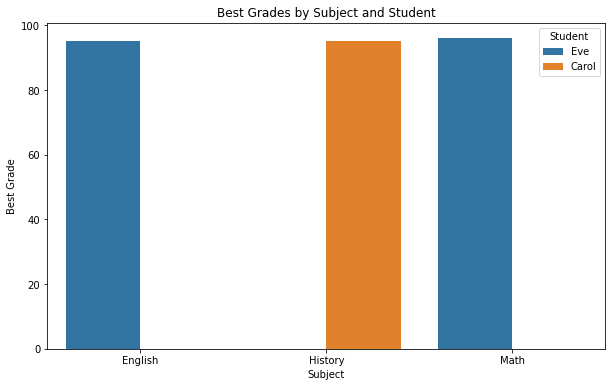

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='subject', y='Best_Grade', hue='first_name', data=best_by_subject)

plt.title('Best Grades by Subject and Student')
plt.xlabel('Subject')
plt.ylabel('Best Grade')
plt.legend(title='Student')
plt.show()

***Close Cursor***

In [77]:
# Close the cursor
cursor.close()

# Explanation
print("Cursor closed!")

Cursor closed!
